# Data Collection
Link: https://raw.githubusercontent.com/twiradinata/datasets/main/property_surabaya.csv

Import Library

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

Data loading

In [73]:
link = 'https://raw.githubusercontent.com/twiradinata/datasets/main/property_surabaya.csv'
dataset = pd.read_csv(link, sep=';')
dataset.head()

,cluster_name,surface_area,building_area,bedrooms,bathrooms,storey,community_price,price,ownership_status,facing,house_position,road_width,urgent,building_age,ready_to_use,furnished,category,pricing_category
0,Northwest Lake,72,69,2,2,2,1400000000,1350000000,Hak Guna Bangunan (HGB),Selatan,Standard,1-2 Mobil,No,1 - 4 Tahun,Yes,No,Premium,Over Priced
1,Bukit Palma,60,90,3,2,2,1000000000,1125000000,Pengikatan Perjanjian Jual Beli (PPJB),Selatan,Standard,1-2 Mobil,No,1 - 4 Tahun,Yes,No,Standard,Over Priced
2,Palma Classica,210,100,4,2,1,2400000000,1999000000,Hak Milik (SHM),Utara,Standard,> 2 Mobil,Yes,5 - 10 Tahun,Yes,No,Standard,Normal Price
3,Bukit Palma,120,54,3,1,1,800000000,850000000,Hak Milik (SHM),Selatan,Standard,> 2 Mobil,No,> 10 Tahun,No,No,Standard,Under Priced
4,Bukit Palma,60,90,3,2,2,800000000,1025000000,Hak Guna Bangunan (HGB),Selatan,Standard,> 2 Mobil,No,1 - 4 Tahun,Yes,No,Standard,Over Priced


In [74]:
# Normalizing the price
dataset['price'] = dataset['price']/1000000
# Dropping the community price
dataset = dataset.drop(['community_price', 'cluster_name'], axis=1)

# Exploratory Data Analysis

In [75]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   surface_area      490 non-null    int64  
 1   building_area     490 non-null    int64  
 2   bedrooms          490 non-null    int64  
 3   bathrooms         490 non-null    int64  
 4   storey            490 non-null    int64  
 5   price             490 non-null    float64
 6   ownership_status  490 non-null    object 
 7   facing            490 non-null    object 
 8   house_position    490 non-null    object 
 9   road_width        490 non-null    object 
 10  urgent            480 non-null    object 
 11  building_age      448 non-null    object 
 12  ready_to_use      490 non-null    object 
 13  furnished         490 non-null    object 
 14  category          490 non-null    object 
 15  pricing_category  451 non-null    object 
dtypes: float64(1), int64(5), object(10)
memory u

In [76]:
dataset.describe()

,surface_area,building_area,bedrooms,bathrooms,storey,price
count,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000
mean,210.679592,241.763265,4.197959,3.265306,1.877551,4506.184020
std,204.129939,238.778138,2.155413,2.093671,0.512927,7623.816047
min,35.000000,32.000000,0.000000,1.000000,1.000000,300.000000
25%,96.250000,110.000000,3.000000,2.000000,2.000000,1400.000000
50%,155.000000,178.500000,4.000000,3.000000,2.000000,2550.000000
75%,240.000000,280.000000,5.000000,4.000000,2.000000,4300.000000
max,2000.000000,2000.000000,36.000000,36.000000,4.000000,105000.000000


In [77]:
# Check missing values
dataset.isnull().sum()

surface_area         0
building_area        0
bedrooms             0
bathrooms            0
storey               0
price                0
ownership_status     0
facing               0
house_position       0
road_width           0
urgent              10
building_age        42
ready_to_use         0
furnished            0
category             0
pricing_category    39
dtype: int64

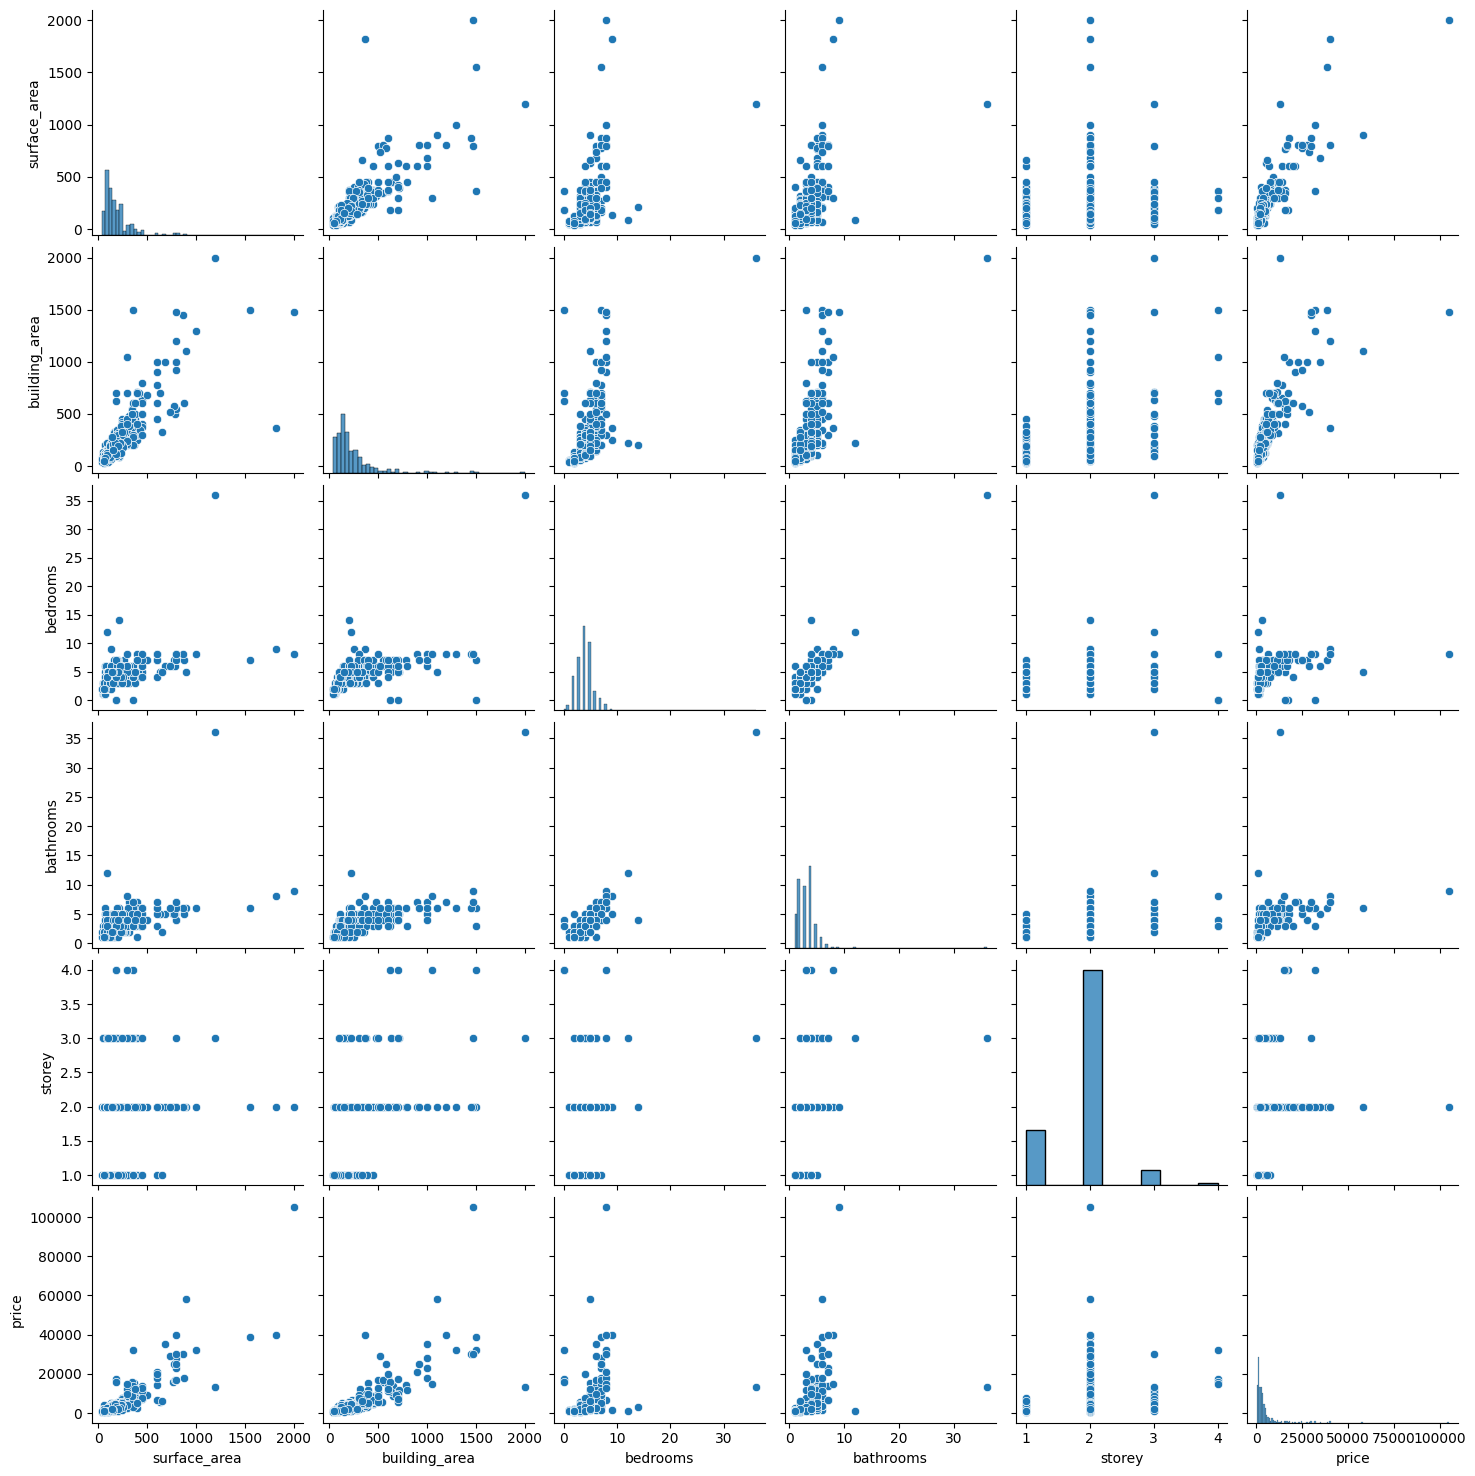

In [78]:
sns.pairplot(dataset)

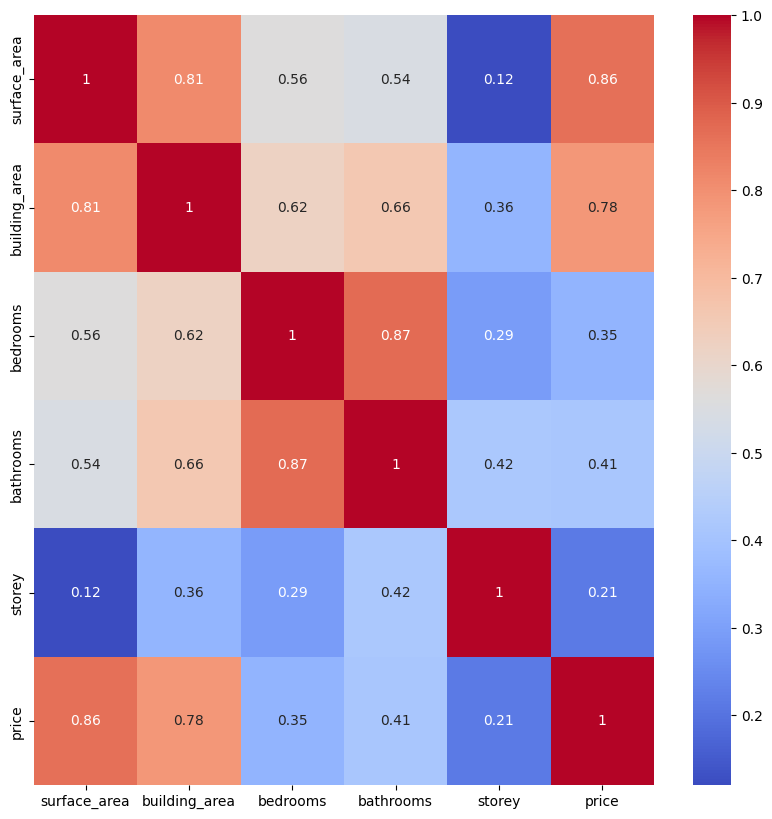

In [79]:
#Correlation of features and price
corr = dataset.corr()
corr['price'].sort_values(ascending=False)
#Plot correlation
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

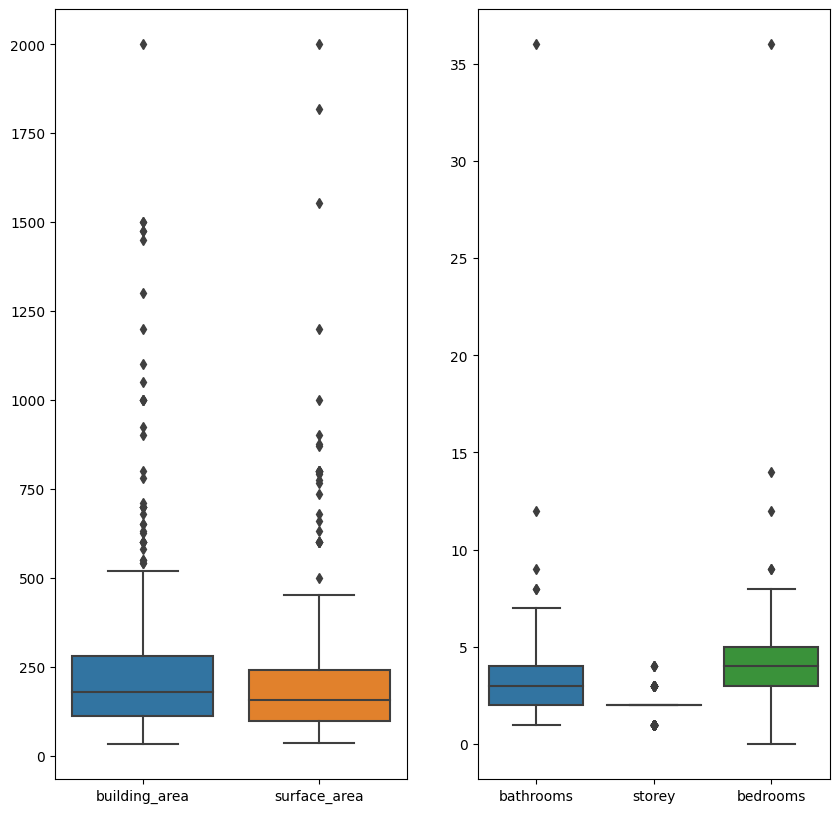

In [80]:
#Boxplot
fig, ax = plt.subplots(1, 2, figsize=(10,10))
sns.boxplot(data=dataset.loc[:, ['building_area', 'surface_area']], ax=ax[0])
sns.boxplot(data=dataset.loc[:, ['bathrooms', 'storey', 'bedrooms']], ax=ax[1])
plt.show()

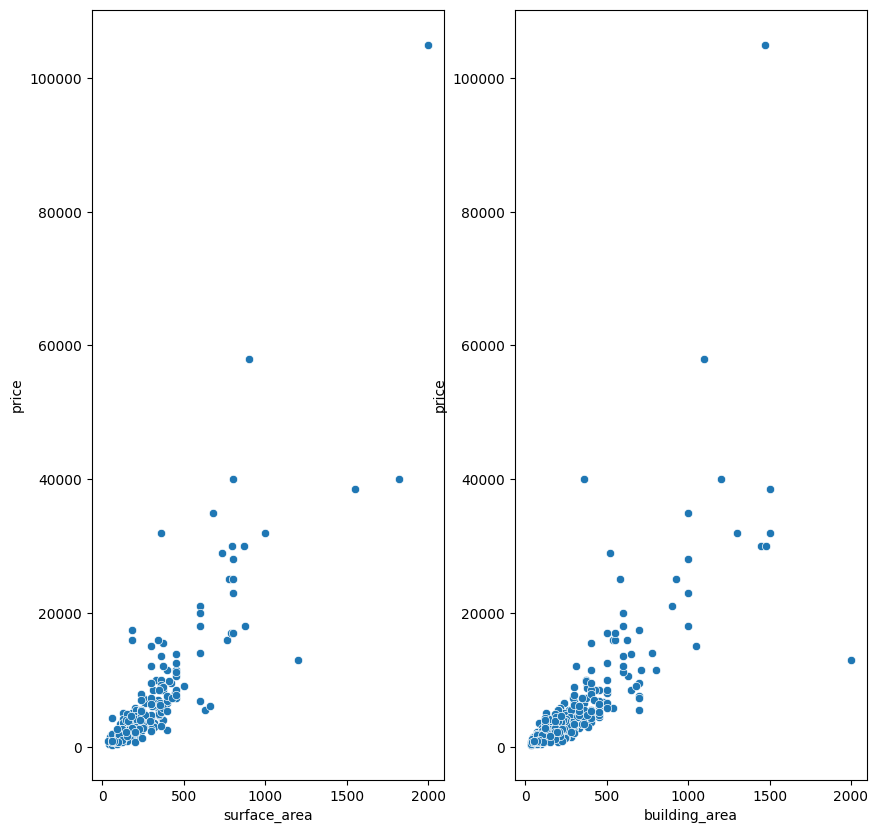

<Figure size 1000x1000 with 0 Axes>

In [81]:
# Scatterplots
fig, ax = plt.subplots(1, 2, figsize=(10,10))
plt.figure(figsize=(10,10))
sns.scatterplot(x='surface_area', y='price', data=dataset, ax=ax[0])
sns.scatterplot(x='building_area', y='price', data=dataset, ax=ax[1])
plt.show()

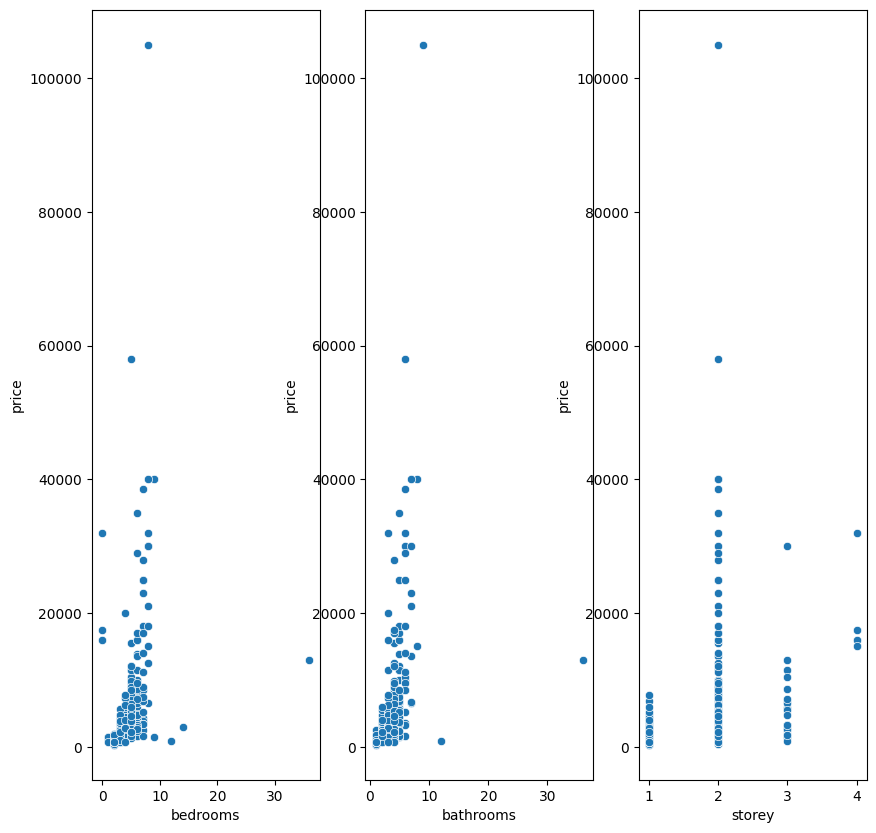

<Figure size 1000x1000 with 0 Axes>

In [82]:
fig, ax = plt.subplots(1, 3, figsize=(10,10))
plt.figure(figsize=(10,10))
sns.scatterplot(x='bedrooms', y='price', data=dataset, ax=ax[0])
sns.scatterplot(x='bathrooms', y='price', data=dataset, ax=ax[1])
sns.scatterplot(x='storey', y='price', data=dataset, ax=ax[2])
plt.show()

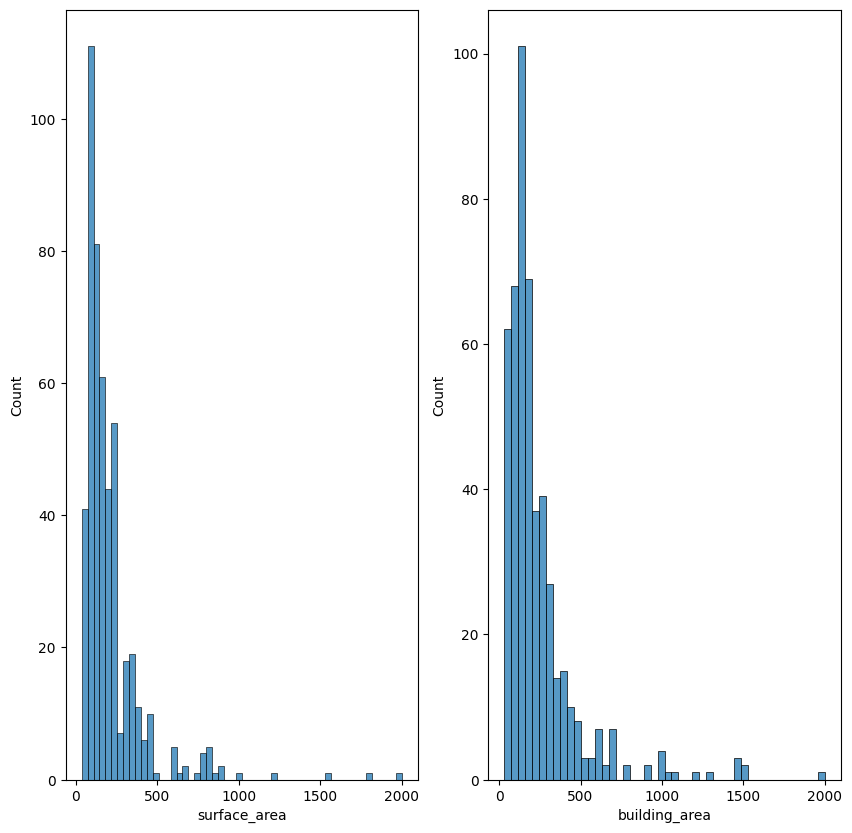

In [83]:
# Data histogram
fig, ax = plt.subplots(1, 2, figsize=(10,10))
sns.histplot(dataset['surface_area'], ax=ax[0])
sns.histplot(dataset['building_area'], ax=ax[1])
plt.show()

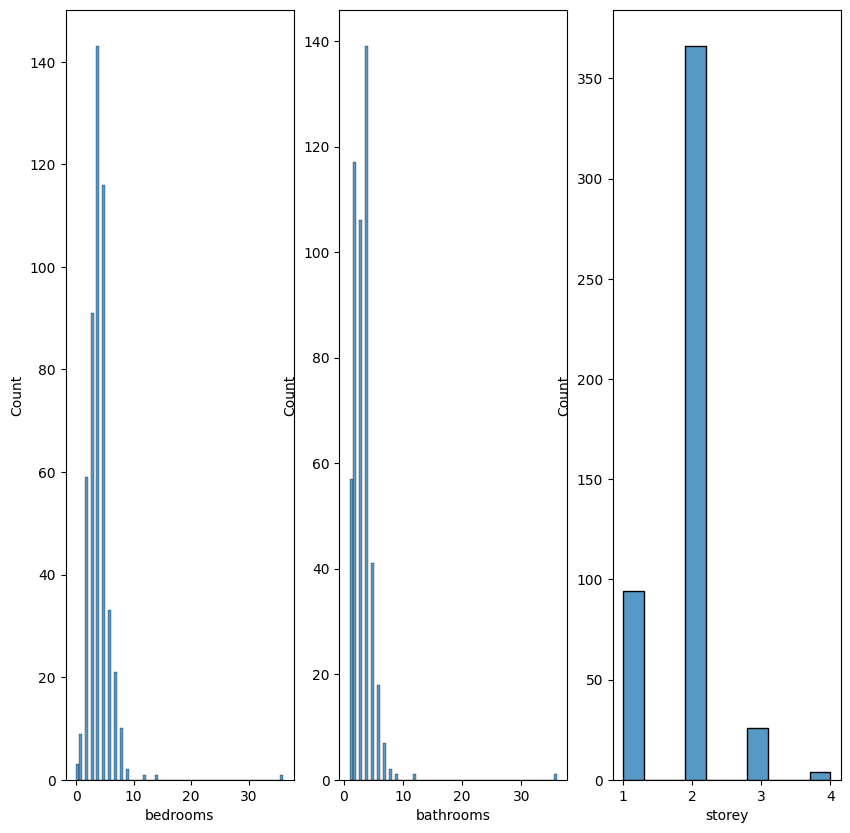

<Figure size 1000x1000 with 0 Axes>

In [84]:
fig, ax = plt.subplots(1, 3, figsize=(10,10))
plt.figure(figsize=(10,10))
sns.histplot(dataset['bedrooms'], ax=ax[0])
sns.histplot(dataset['bathrooms'], ax=ax[1])
sns.histplot(dataset['storey'], ax=ax[2])
plt.show()

# Data preparation

Impute missing values

In [85]:
# from sklearn.impute import SimpleImputer

# categorical_imputer = SimpleImputer(strategy='most_frequent')
# dataset.loc[:, ['urgent', 'building_age', 'pricing_category']] = categorical_imputer.fit_transform(dataset[['urgent', 'building_age', 'pricing_category']])

Encode categorical features

In [87]:
le = LabelEncoder()
dataset.loc[:, ['ownership_status', 'facing', 'house_position', 'road_width', 'urgent', 'building_age', 'ready_to_use', 'furnished', 'category', 'pricing_category']] = dataset.loc[:, ['ownership_status', 'facing', 'house_position', 'road_width', 'urgent', 'building_age', 'ready_to_use', 'furnished', 'category', 'pricing_category']].apply(le.fit_transform)

dataset.head()


,surface_area,building_area,bedrooms,bathrooms,storey,price,ownership_status,facing,house_position,road_width,urgent,building_age,ready_to_use,furnished,category,pricing_category
0,72,69,2,2,2,1350.0,0,1,2,0,0,0,1,0,0,1
1,60,90,3,2,2,1125.0,2,1,2,0,0,0,1,0,2,1
2,210,100,4,2,1,1999.0,1,3,2,2,1,1,1,0,2,0
3,120,54,3,1,1,850.0,1,1,2,2,0,2,0,0,2,2
4,60,90,3,2,2,1025.0,0,1,2,2,0,0,1,0,2,1


Splitting into training and validation set

In [88]:
#Regression
X_reg = dataset.loc[:, dataset.columns != 'price']
y_reg = dataset.loc[:, 'price']

In [89]:
scaler = MinMaxScaler()
X_reg_scaled = scaler.fit_transform(X_reg)

In [98]:
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg_scaled, y_reg, test_size=0.2, random_state=42)

In [99]:
lin_reg = LinearRegression()
lin_reg.fit(X_reg_train, y_reg_train)

regressors = []
regressors.append(lin_reg)

In [101]:
def evaluate(regressor, X_test, y_test):
    y_pred = regressor.predict(X_reg_test)
    print("R^2 : ", r2_score(y_reg_test, y_pred))
    print("MAE :", mean_absolute_error(y_reg_test,y_pred))
    print("RMSE:",np.sqrt(mean_squared_error(y_reg_test, y_pred)))

In [103]:
for regressor in regressors:
    print(regressor.__class__.__name__)
    evaluate(regressor, X_reg_test, y_reg_test)
    print("\n")

LinearRegression
R^2 :  0.7789506763362426
MAE : 1646.9091031300027
RMSE: 3300.4070580758985


